<a href="https://colab.research.google.com/github/NeybaT/collab12/blob/main/Copia_de_Classification_Interpolacion_Graficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!unzip Data.zip

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import numpy as np
import os
from scipy.interpolate import interp1d
from sklearn.manifold import TSNE

# Configuración inicial
directory_path = '/gdrive/MyDrive/Data set Alphasuero'  # Ajusta esta ruta al directorio que contiene tus archivos CSV
start_row = 5  # Fila de inicio para la lectura de datos
end_row = 4000  # Fila de finalización para la lectura de datos
new_wavenumber_step = 0.5  # Definir el paso de longitudes de onda para la interpolación

# Lista para almacenar todos los arreglos de datos interpolados y los lotes
interpolated_data = []
labels = []

# Definir el rango de longitudes de onda uniforme (ajustar según sea necesario)
min_wavenumber = 400  # Este valor debe ajustarse basado en tus datos
max_wavenumber = 3000  # Este valor debe ajustarse basado en tus datos
new_wavenumbers = np.arange(min_wavenumber, max_wavenumber, new_wavenumber_step)

# Función para extraer el lote del nombre del archivo
def extract_batch(filename):
    return filename.split('-')[0]

# Iterar a través de cada archivo en el directorio
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):  # Verificar que es un archivo CSV
        file_path = os.path.join(directory_path, filename)
        # Leer solo el rango de filas deseado, saltándose las filas del encabezado
        data = pd.read_csv(file_path, skiprows=start_row, header=None)

        if data.shape[0] < 2:  # Verificar que haya suficientes datos para la interpolación
            print(f"Archivo: {filename} no tiene suficientes datos para interpolación.")
            continue

        wavenumbers = data.iloc[:, 0].values  # Extraer la columna de número de onda
        absorbances = data.iloc[:, 1].values  # Extraer la columna de absorbancia

        # Crear la función de interpolación
        interpolation_function = interp1d(wavenumbers, absorbances, kind='linear', fill_value='extrapolate')

        # Calcular los valores interpolados de absorbancia
        interpolated_absorbances = interpolation_function(new_wavenumbers)

        # Agregar los datos interpolados al arreglo principal
        interpolated_data.append(interpolated_absorbances)

        # Extraer el lote del nombre del archivo y agregar a las etiquetas
        batch = extract_batch(filename)
        labels.append(batch)

        min_wavenumber = np.min(wavenumbers) if len(wavenumbers) > 0 else 'No Data'
        max_wavenumber = np.max(wavenumbers) if len(wavenumbers) > 0 else 'No Data'
        print(f"Archivo: {filename}, Total de renglones: {data.shape[0]}, Min Número de Onda: {min_wavenumber}, Max Número de Onda: {max_wavenumber}")

# Convertir la lista de datos interpolados a un arreglo de NumPy
interpolated_data_array = np.array(interpolated_data)

# Crear un DataFrame con los datos interpolados y las etiquetas
df = pd.DataFrame(interpolated_data_array, columns=new_wavenumbers)
df['Lote'] = labels

print(df.head())


Archivo: ASE04-27.csv, Total de renglones: 1869, Min Número de Onda: 399.185668, Max Número de Onda: 4001.498848
Archivo: ASE04-26.csv, Total de renglones: 1869, Min Número de Onda: 399.185668, Max Número de Onda: 4001.498848
Archivo: ASE04-28.csv, Total de renglones: 1869, Min Número de Onda: 399.185668, Max Número de Onda: 4001.498848
Archivo: ASE04-29.csv, Total de renglones: 1869, Min Número de Onda: 399.185668, Max Número de Onda: 4001.498848
Archivo: ASE04-30.csv, Total de renglones: 1869, Min Número de Onda: 399.185668, Max Número de Onda: 4001.498848
Archivo: ASE04-31.csv, Total de renglones: 1869, Min Número de Onda: 399.185668, Max Número de Onda: 4001.498848
Archivo: ASE04-32.csv, Total de renglones: 1869, Min Número de Onda: 399.185668, Max Número de Onda: 4001.498848
Archivo: ASE04-33.csv, Total de renglones: 1869, Min Número de Onda: 399.185668, Max Número de Onda: 4001.498848
Archivo: ASE04-34.csv, Total de renglones: 1869, Min Número de Onda: 399.185668, Max Número de O

In [ ]:
# Crear un DataFrame con los datos interpolados y las etiquetas
df = pd.DataFrame(interpolated_data_array, columns=new_wavenumbers)
df.insert(0, 'Lote', labels)  # Insertar la columna 'Lote' en la primera posición

df

,Lote,400.0,400.5,401.0,401.5,402.0,402.5,403.0,403.5,404.0,...,2995.0,2995.5,2996.0,2996.5,2997.0,2997.5,2998.0,2998.5,2999.0,2999.5
0,ASE04,0.017366,0.011935,0.006504,0.002485,-0.001117,-0.004719,-0.008321,-0.014603,-0.021135,...,0.018089,0.018088,0.018088,0.018087,0.018084,0.018078,0.018073,0.018067,0.018071,0.018082
1,ASE04,0.022711,0.020922,0.019133,0.016040,0.012561,0.009082,0.005603,-0.001250,-0.008417,...,0.018149,0.018143,0.018136,0.018130,0.018128,0.018132,0.018135,0.018139,0.018153,0.018174
2,ASE04,-0.009759,-0.005040,-0.000320,-0.000747,-0.002696,-0.004645,-0.006594,-0.014914,-0.023825,...,0.018152,0.018143,0.018134,0.018126,0.018118,0.018112,0.018107,0.018101,0.018108,0.018126
3,ASE04,-0.004406,-0.006073,-0.007741,-0.009402,-0.011060,-0.012719,-0.014377,-0.017577,-0.020921,...,0.018172,0.018157,0.018143,0.018128,0.018118,0.018113,0.018109,0.018104,0.018111,0.018127
4,ASE04,0.003539,0.002282,0.001026,-0.003930,-0.009980,-0.016030,-0.022080,-0.030363,-0.038853,...,0.018039,0.018028,0.018018,0.018007,0.017999,0.017995,0.017990,0.017986,0.017991,0.018003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,L,0.614114,0.452434,0.290754,0.256809,0.260633,0.264457,0.268281,0.276480,0.285087,...,0.023024,0.023033,0.023043,0.023053,0.023069,0.023093,0.023118,0.023142,0.023175,0.023214
544,L,0.677524,0.512796,0.348068,0.316640,0.324626,0.332612,0.340598,0.342231,0.343274,...,0.023019,0.023027,0.023035,0.023043,0.023056,0.023075,0.023095,0.023114,0.023141,0.023175
545,L,0.677524,0.512796,0.348068,0.316640,0.324626,0.332612,0.340598,0.342231,0.343274,...,0.023019,0.023027,0.023035,0.023043,0.023056,0.023075,0.023095,0.023114,0.023141,0.023175
546,L,0.976162,0.753518,0.530875,0.476270,0.471351,0.466431,0.461512,0.481516,0.503837,...,0.022901,0.022914,0.022927,0.022940,0.022959,0.022985,0.023010,0.023036,0.023066,0.023098


In [ ]:
one_hot_encoded = pd.get_dummies(df['Lote'], prefix='Lote')
one_hot_encoded = one_hot_encoded.astype(int)



In [ ]:
df = pd.concat([one_hot_encoded, df], axis=1)


In [ ]:
df=df.drop(columns='Lote')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Supongamos que `df` es tu DataFrame con las características y las columnas de one-hot encoding

# Verificar y manejar los valores NaN
df = df.dropna()

# Asegurarse de que todas las columnas sean de tipo numérico
#df = df.apply(pd.to_numeric)

# Dividir los datos en características (X) y etiquetas (y)
# Filtrar las columnas que comienzan con 'Lote_'
lote_columns = [col for col in df.columns if isinstance(col, str) and col.startswith('Lote_')]
X = df.drop(columns=lote_columns)
y = df[lote_columns]


In [ ]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
X_train

,400.0,400.5,401.0,401.5,402.0,402.5,403.0,403.5,404.0,404.5,...,2995.0,2995.5,2996.0,2996.5,2997.0,2997.5,2998.0,2998.5,2999.0,2999.5
46,0.001700,0.001700,0.001700,0.001700,0.001700,0.001700,0.001700,0.001700,0.001700,0.001700,...,0.024167,0.024166,0.024165,0.024164,0.024171,0.024190,0.024210,0.024229,0.024263,0.024308
93,0.198866,0.198866,0.198866,0.198866,0.198866,0.198866,0.198866,0.198866,0.198866,0.198866,...,0.020216,0.020203,0.020189,0.020176,0.020170,0.020174,0.020177,0.020181,0.020193,0.020210
464,0.037017,0.037017,0.037017,0.037017,0.037017,0.037017,0.037017,0.037017,0.037017,0.037017,...,0.018337,0.018335,0.018334,0.018333,0.018340,0.018358,0.018376,0.018394,0.018413,0.018433
321,0.160749,0.160749,0.160749,0.160749,0.160749,0.160749,0.160749,0.157055,0.153017,0.148979,...,0.032110,0.032097,0.032084,0.032071,0.032066,0.032073,0.032080,0.032087,0.032101,0.032121
272,-0.175981,-0.175981,-0.175981,-0.175981,-0.175981,-0.175981,-0.175981,-0.175981,-0.175981,-0.175981,...,0.020956,0.020960,0.020963,0.020967,0.020983,0.021016,0.021050,0.021083,0.021123,0.021167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.048828,0.048828,0.048828,0.048828,0.048828,0.048828,0.048828,0.048828,0.048828,0.048828,...,0.023601,0.023595,0.023590,0.023585,0.023592,0.023615,0.023639,0.023662,0.023688,0.023715
106,0.314893,0.314893,0.314893,0.314893,0.314893,0.314893,0.314893,0.314893,0.314893,0.314893,...,0.020036,0.020022,0.020009,0.019995,0.019991,0.019999,0.020008,0.020016,0.020035,0.020062
270,-0.251248,-0.251248,-0.251248,-0.251248,-0.251248,-0.251248,-0.251248,-0.251248,-0.251248,-0.251248,...,0.020676,0.020685,0.020693,0.020701,0.020719,0.020748,0.020777,0.020806,0.020843,0.020884
435,0.046707,0.046707,0.046707,0.046707,0.046707,0.046707,0.046707,0.046707,0.046707,0.046707,...,0.022335,0.022329,0.022322,0.022316,0.022315,0.022321,0.022328,0.022334,0.022341,0.022347


Epoch 1/500
11/11 [==============================] - 3s 27ms/step - loss: 2.3867 - accuracy: 0.1171 - val_loss: 2.3845 - val_accuracy: 0.0455
Epoch 2/500
11/11 [==============================] - 0s 8ms/step - loss: 2.3145 - accuracy: 0.1486 - val_loss: 2.2277 - val_accuracy: 0.2614
Epoch 3/500
11/11 [==============================] - 0s 7ms/step - loss: 2.2281 - accuracy: 0.2086 - val_loss: 2.1247 - val_accuracy: 0.2500
Epoch 4/500
11/11 [==============================] - 0s 7ms/step - loss: 2.1135 - accuracy: 0.2800 - val_loss: 1.9468 - val_accuracy: 0.3750
Epoch 5/500
11/11 [==============================] - 0s 8ms/step - loss: 2.0129 - accuracy: 0.3314 - val_loss: 1.8761 - val_accuracy: 0.3068
Epoch 6/500
11/11 [==============================] - 0s 8ms/step - loss: 1.9138 - accuracy: 0.3457 - val_loss: 1.7201 - val_accuracy: 0.4773
Epoch 7/500
11/11 [==============================] - 0s 7ms/step - loss: 1.8326 - accuracy: 0.3714 - val_loss: 1.6658 - val_accuracy: 0.3977
Epoch 8/500


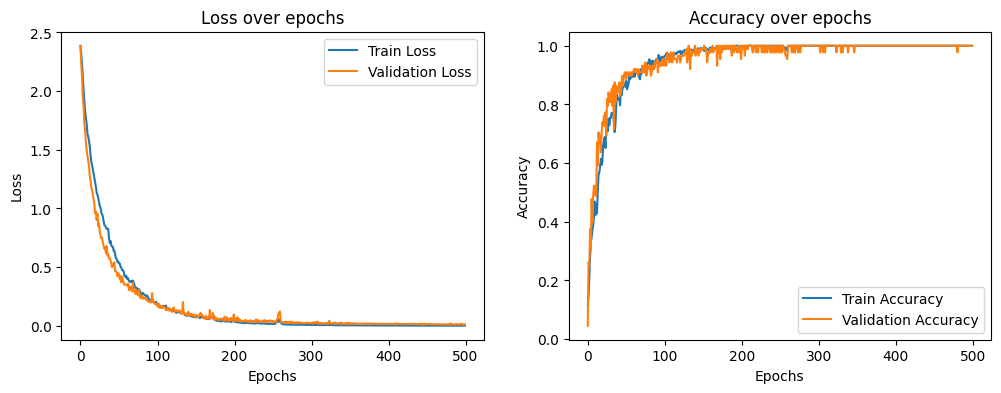

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Supongamos que `df` es tu DataFrame con las características y las columnas de one-hot encoding

# Dividir los datos en características (X) y etiquetas (y)
#X = df.drop(columns=[col for col in df.columns if col.startswith('Lote_')])
#y = df[[col for col in df.columns if col.startswith('Lote_')]]

# Dividir los datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir el modelo
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Usar softmax para clasificación multiclase

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo y guardar el objeto History
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Graficar la pérdida y la precisión a lo largo de las épocas
plt.figure(figsize=(12, 4))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


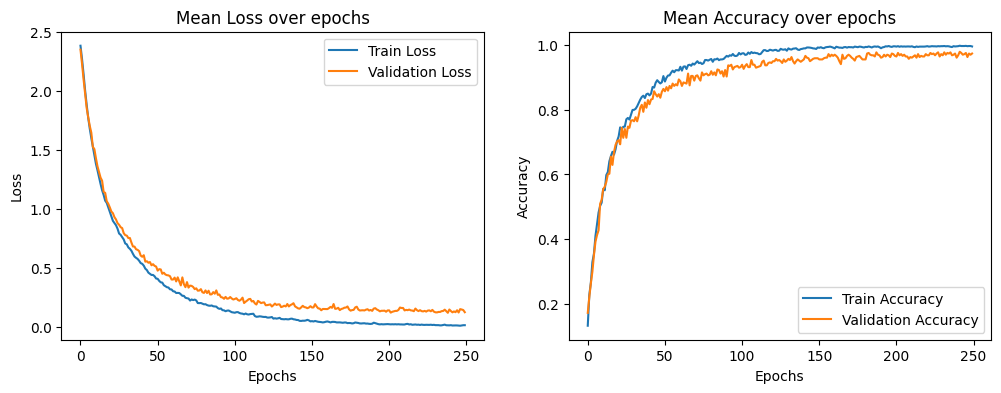

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Definir el número de pliegues para la validación cruzada
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lista para almacenar los resultados de cada pliegue
all_train_loss = []
all_val_loss = []
all_train_accuracy = []
all_val_accuracy = []

# Función para crear el modelo
def create_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))  # Usar softmax para clasificación multiclase
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

# Realizar la validación cruzada
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = create_model(X_train.shape[1], y_train.shape[1])

    history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])
    all_train_accuracy.append(history.history['accuracy'])
    all_val_accuracy.append(history.history['val_accuracy'])

# Promediar los resultados de todos los pliegues
mean_train_loss = np.mean(all_train_loss, axis=0)
mean_val_loss = np.mean(all_val_loss, axis=0)
mean_train_accuracy = np.mean(all_train_accuracy, axis=0)
mean_val_accuracy = np.mean(all_val_accuracy, axis=0)

# Graficar la pérdida y la precisión promedio a lo largo de las épocas
plt.figure(figsize=(12, 4))

# Gráfico de la pérdida promedio
plt.subplot(1, 2, 1)
plt.plot(mean_train_loss, label='Train Loss')
plt.plot(mean_val_loss, label='Validation Loss')
plt.title('Mean Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Gráfico de la precisión promedio
plt.subplot(1, 2, 2)
plt.plot(mean_train_accuracy, label='Train Accuracy')
plt.plot(mean_val_accuracy, label='Validation Accuracy')
plt.title('Mean Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# Entrenar el modelo final con todos los datos de entrenamiento
final_model = create_model(X_train.shape[1], y_train.shape[1])
final_model.fit(X_train, y_train, epochs=250, batch_size=32, verbose=1)

# Evaluar el modelo final en el conjunto de prueba
loss, accuracy = final_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/250
14/14 [==============================] - 1s 5ms/step - loss: 2.3960 - accuracy: 0.0911
Epoch 2/250
14/14 [==============================] - 0s 5ms/step - loss: 2.3062 - accuracy: 0.2642
Epoch 3/250
14/14 [==============================] - 0s 5ms/step - loss: 2.2045 - accuracy: 0.2392
Epoch 4/250
14/14 [==============================] - 0s 5ms/step - loss: 2.1015 - accuracy: 0.3098
Epoch 5/250
14/14 [==============================] - 0s 5ms/step - loss: 1.9864 - accuracy: 0.3394
Epoch 6/250
14/14 [==============================] - 0s 6ms/step - loss: 1.8762 - accuracy: 0.3599
Epoch 7/250
14/14 [==============================] - 0s 5ms/step - loss: 1.7822 - accuracy: 0.4100
Epoch 8/250
14/14 [==============================] - 0s 5ms/step - loss: 1.6883 - accuracy: 0.4055
Epoch 9/250
14/14 [==============================] - 0s 5ms/step - loss: 1.6107 - accuracy: 0.4943
Epoch 10/250
14/14 [==============================] - 0s 6ms/step - loss: 1.5461 - accuracy: 0.4806
Epoch 11/

4/4 [==============================] - 0s 3ms/step


KeyError: 0

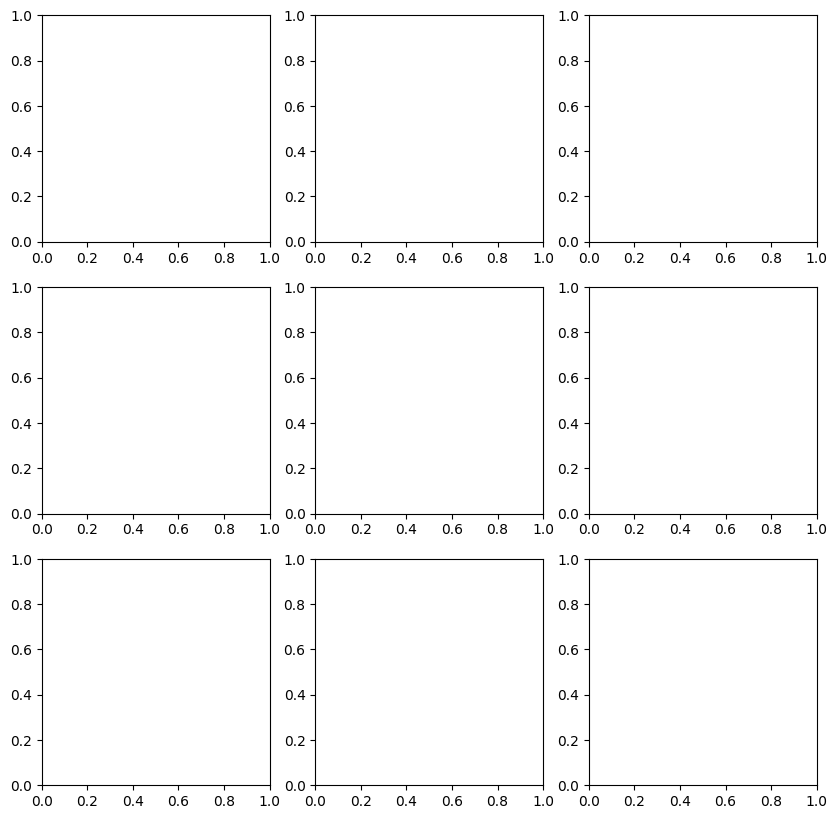

In [ ]:
# Generar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Convertir las predicciones a etiquetas
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Visualizar algunas predicciones
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i in np.arange(0, 9):
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].set_title(f'Pred: {y_pred_labels[i]}\nTrue: {y_test_labels[i]}')
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()